# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
#change the city everytime        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olyokminsk
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | shima
Processing Record 8 of Set 1 | shizunai-furukawacho
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | moree
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | urumqi
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | la ronge
Processing Record 20 of Set 1 | necochea
Processing Record 21 of Set 1 | 

Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | trevelin
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | xianyang
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | kalynivka
Processing Record 47 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 48 of Set 4 | uusikaupunki
Processing Record 49 of Set 4 | portel
Processing Record 0 of Set 5 | saratamata
City not found. Skipping...
Processing Record 1 of Set 5 | pitimbu
Processing Record 2 of Set 5 | fortuna foothills
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | north bay
Processing Record 5 of Set 5 | kourou
Processing Record 6 of Set 5 | howrah
Processing Record 7 of Set 5 | la mira
Processing Record 8 of Set 5 | paradera
City not found. Skipping...
Processing Record 9 of Set 5 | mandalgovi
Processing Record 10 of Set 5 | palmer
Processing Record 11 of Set 5 | newman
Proces

Processing Record 31 of Set 8 | cao bang
Processing Record 32 of Set 8 | cable beach
City not found. Skipping...
Processing Record 33 of Set 8 | yuzhno-kurilsk
Processing Record 34 of Set 8 | amuntai
Processing Record 35 of Set 8 | labrador city
Processing Record 36 of Set 8 | tokar
Processing Record 37 of Set 8 | kiama
Processing Record 38 of Set 8 | fabens
Processing Record 39 of Set 8 | nadym
Processing Record 40 of Set 8 | rawson
Processing Record 41 of Set 8 | mili
Processing Record 42 of Set 8 | nueva palmira
Processing Record 43 of Set 8 | san julian
Processing Record 44 of Set 8 | tekanpur
Processing Record 45 of Set 8 | vadso
Processing Record 46 of Set 8 | priozersk
Processing Record 47 of Set 8 | veraval
Processing Record 48 of Set 8 | xapuri
Processing Record 49 of Set 8 | lexington
Processing Record 0 of Set 9 | kursenai
Processing Record 1 of Set 9 | omidiyeh
Processing Record 2 of Set 9 | collinsville
Processing Record 3 of Set 9 | souillac
Processing Record 4 of Set 9 |

Processing Record 20 of Set 12 | iguatu
Processing Record 21 of Set 12 | sinabang
Processing Record 22 of Set 12 | fort bragg
Processing Record 23 of Set 12 | chonchi
Processing Record 24 of Set 12 | buka
Processing Record 25 of Set 12 | salinopolis
Processing Record 26 of Set 12 | porto novo
Processing Record 27 of Set 12 | kailua-kona
Processing Record 28 of Set 12 | boundiali
Processing Record 29 of Set 12 | east ballina
Processing Record 30 of Set 12 | melfort
Processing Record 31 of Set 12 | chapada dos guimaraes
Processing Record 32 of Set 12 | ponta delgada
Processing Record 33 of Set 12 | kingscliff
Processing Record 34 of Set 12 | faya-largeau
Processing Record 35 of Set 12 | rudbar
Processing Record 36 of Set 12 | altai
Processing Record 37 of Set 12 | al khawr
Processing Record 38 of Set 12 | desna
Processing Record 39 of Set 12 | crane
Processing Record 40 of Set 12 | chul'man
Processing Record 41 of Set 12 | yambio
Processing Record 42 of Set 12 | tromso
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olyokminsk,60.3736,120.4264,270.92,77,100,4.47,RU,1697660735
1,bilibino,68.0546,166.4372,255.35,100,98,0.79,RU,1697660736
2,kodiak,57.7900,-152.4072,281.88,43,0,11.83,US,1697660737
3,olonkinbyen,70.9221,-8.7187,276.59,88,100,10.58,SJ,1697660737
4,college,64.8569,-147.8028,272.12,83,100,1.54,US,1697660737


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("World_Weather_Analysis.csv")

In [7]:
# Read saved data
city_data_df = pd.read_csv("World_Weather_Analysis.csv", index_col="City")

# Display sample data
city_data_df.head()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
olyokminsk,0,60.3736,120.4264,270.92,77,100,4.47,RU,1697660735
bilibino,1,68.0546,166.4372,255.35,100,98,0.79,RU,1697660736
kodiak,2,57.7900,-152.4072,281.88,43,0,11.83,US,1697660737
olonkinbyen,3,70.9221,-8.7187,276.59,88,100,10.58,SJ,1697660737
college,4,64.8569,-147.8028,272.12,83,100,1.54,US,1697660737


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

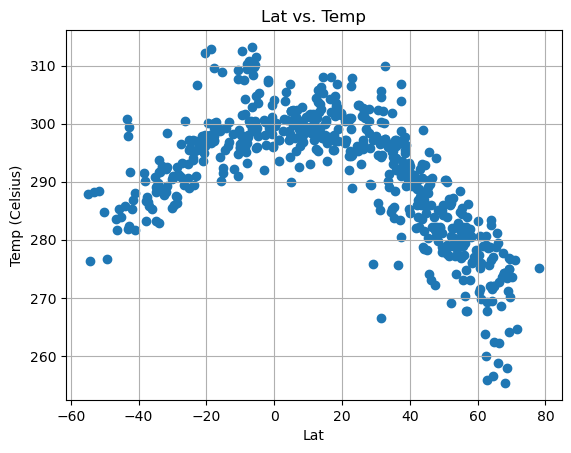

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
# Incorporate the other graph properties
plt.title("Lat vs. Temp")
plt.ylabel("Temp (Celsius)")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()



#### Latitude Vs. Humidity

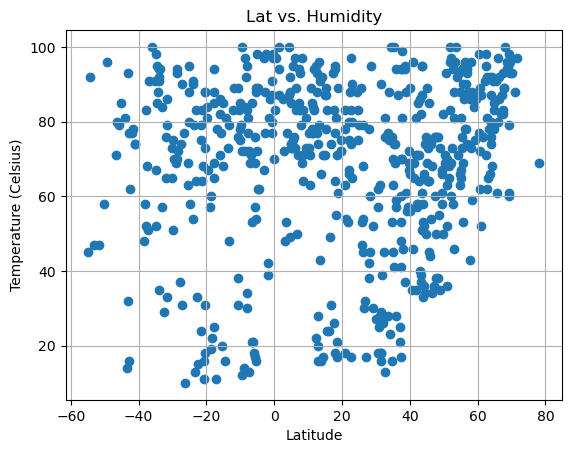

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Lat vs. Humidity" )
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

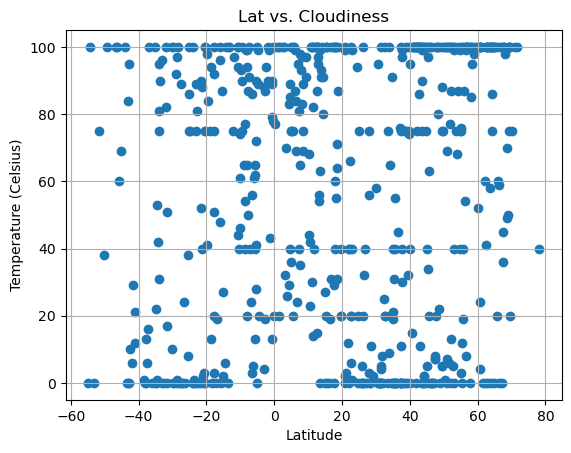

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Lat vs. Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

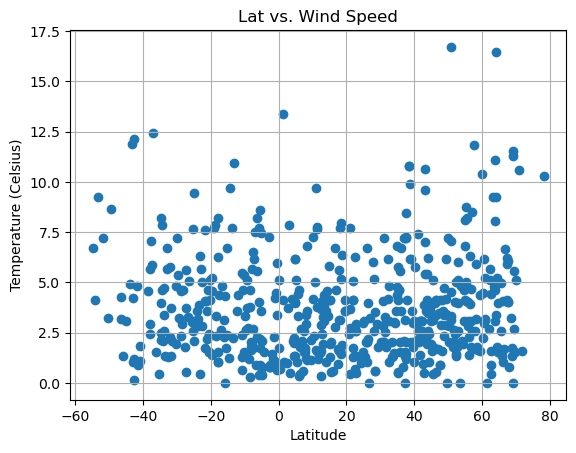

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")


# Incorporate the other graph properties
plt.title("Lat vs. Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y,title):



    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


 











In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_data = {
    "City": cities,
    "Latitude": city_lat,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
}

# Create the DataFrame
northern_hemi_df = pd.DataFrame(northern_hemi_data)

northern_hemi_df.head()

# LL check to make sure you're doing dataframe correctly

,City,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olyokminsk,13.7956,306.34,16,91,4.11,NE,1697660828
1,bilibino,13.7956,306.34,16,91,4.11,NE,1697660828
2,kodiak,13.7956,306.34,16,91,4.11,NE,1697660828
3,olonkinbyen,13.7956,306.34,16,91,4.11,NE,1697660828
4,college,13.7956,306.34,16,91,4.11,NE,1697660828


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_data = {
    "City": cities,
    "Latitude": city_lat,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
}

# Create the DataFrame
southern_hemi_df = pd.DataFrame(southern_hemi_data)

# Display sample data
southern_hemi_df.head()

,City,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olyokminsk,13.7956,306.34,16,91,4.11,NE,1697660828
1,bilibino,13.7956,306.34,16,91,4.11,NE,1697660828
2,kodiak,13.7956,306.34,16,91,4.11,NE,1697660828
3,olonkinbyen,13.7956,306.34,16,91,4.11,NE,1697660828
4,college,13.7956,306.34,16,91,4.11,NE,1697660828


###  Temperature vs. Latitude Linear Regression Plot

In [16]:

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Max Temp"], southern_hemi_df["Latitude"])

# Calculate the regression values
regress_values = southern_hemi_df["Max Temp","Humidity","Cloudiness","Wind","Speed", "Country"] * slope + intercept

# Create the linear regression equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create a scatter plot
plt.scatter(southern_hemi_df["Max Temp","Humidity","Cloudiness","Wind","Speed", "Country"], southern_hemi_df["Latitude"])
plt.plot(southern_hemi_df["Latitude"], regress_values, "r-")
plt.annotate(line_eq, (southern_hemi_df["Max Temp"].min(), southern_hemi_df["Latitude"].min()), fontsize=12, color="red")

# Add labels and a title to the plot
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Latitude")
plt.title("Linear Regression: Max Temperature vs. Latitude (Southern Hemisphere)")

# Display the plot
plt.show()







ValueError: Cannot calculate a linear regression if all x values are identical

ValueError: s must be a scalar, or float array-like with the same size as x and y

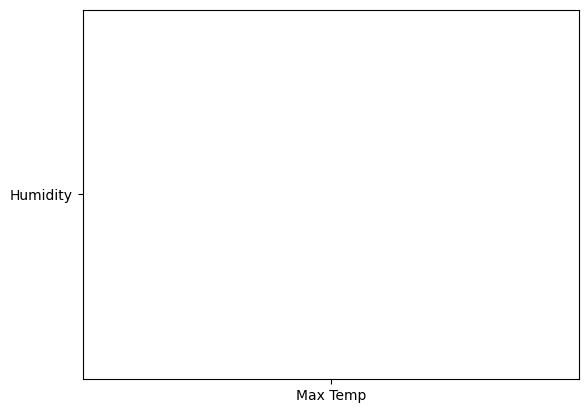

In [18]:
# Linear regression on Southern Hemisphere
# Perform linear regression

plt.scatter("Max Temp","Humidity","Cloudiness","Wind","Speed", "Country")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [19]:
# Northern Hemisphere
 
 # Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")


NameError: name 'x_values' is not defined

In [ ]:
# Southern Hemisphere
 # Create a Scatter Plot for temperature vs latitude
x_values = southern_hemi_data['Latitude']
y_values = southern_hemi_data['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_Cloudiness = northern_hemi_data['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()


In [ ]:
# Southern Hemisphere
x_values = southern_hemi_data['Latitude']
y_values = southern_hemi_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_Cloudiness = northern_hemi_data['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_data['Latitude']
y_values = southern_hemi_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE